# Chapter 9

## Machine vision

In [14]:
#importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model

downloading the CIFAR10 dataset and dividing data into training images and training labels, test images and test labels

there are 60,000 32x32 colour images in 10 classes with 6,000 images per class
- there are 50,000 training images and 10,000 test images
- the classes are as follows:
- 1-airplane, 2-car, 3-bird, 4-cat, 5-deer, 6-dog, 7-frog, 8-horse, 9-ship, 10-truck

In [15]:
cifar10_data = tf.keras.datasets.cifar10

(training_images, training_labels),(test_images, test_labels) = cifar10_data.load_data()

the images in the dataset are colour images, with each pixel rgb channel value between 0 and 255

this code normalises pixel values between 0 and 1

In [16]:
training_images, test_images = training_images/255.0, test_images/255.0

training_labels, test_labels = training_labels.flatten(), test_labels.flatten()

print(training_labels.shape)
print(training_images.shape)

#the next step would be to change the dimensions of our input images
#CNN in Keras expects data to be in the format Width-Height-Channels
#since our images are in colour they do have channels
#so we don't need to convert the data into the right shape as before with greyscale

(50000,)
(50000, 32, 32, 3)


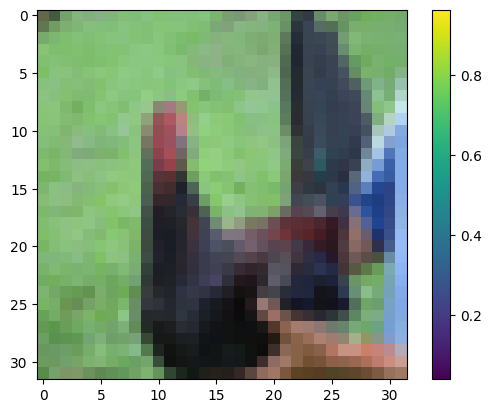

In [30]:
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()
#this output shows that the 9th image from the test images is a bird

the next step is to find the number of output classes

this number will be used to define the number of neurons in the output layer

In [18]:
output_classes = len(set(training_labels))
print("Number of output classes is:", output_classes)
#the number of output classes in the dataset is 10, as expected (10 categories as discussed earlier)

Number of output classes is: 10


In [19]:
#let's print the shape of a single image in the training set

training_images[0].shape

(32, 32, 3)

this code creates a model for our CNN

In [20]:
#developing the CNN model

input_layer = Input(shape=training_images[0].shape)
conv1 = Conv2D(32,(3,3),strides=2,activation="relu")(input_layer)
maxpool1 = MaxPool2D(2,2)(conv1)
conv2 = Conv2D(64,(3,3),strides=2,activation="relu")(maxpool1)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512,activation="relu")(drop1)
drop2 = Dropout(0.2)(dense1)
output_layer = Dense(output_classes,activation="softmax")(drop2)

model = Model(input_layer,output_layer)

In [21]:
#this code compiles the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

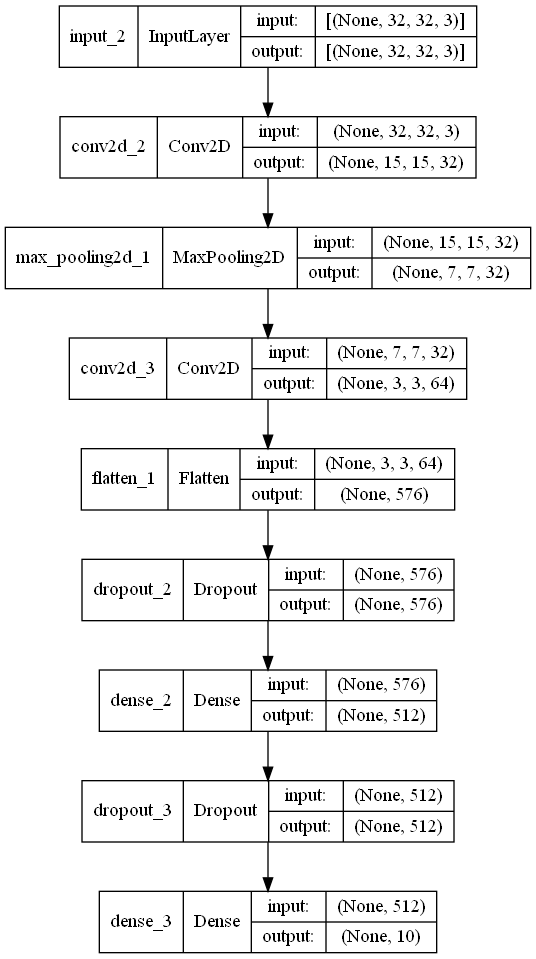

In [22]:
#the following code prints the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="model_plot3.png",show_shapes=True,show_layer_names=True)

In [23]:
#training the model with 20 epochs 

model_history = model.fit(training_images,training_labels,epochs=20,validation_data=(test_images,test_labels),verbose=1)

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5638 - accuracy: 0.4332 - val_loss: 1.3822 - val_accuracy: 0.4901
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2831 - accuracy: 0.5444 - val_loss: 1.1754 - val_accuracy: 0.5780
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1608 - accuracy: 0.5894 - val_loss: 1.0965 - val_accuracy: 0.6127
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0703 - accuracy: 0.6225 - val_loss: 1.0370 - val_accuracy: 0.6330
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9935 - accuracy: 0.6501 - val_loss: 0.9855 - val_accuracy: 0.6547
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9295 - accuracy: 0.6724 - val_loss: 0.9651 - val_accuracy: 0.6572
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8725 - accuracy: 0.6928 - val_loss: 0.9137 - val_

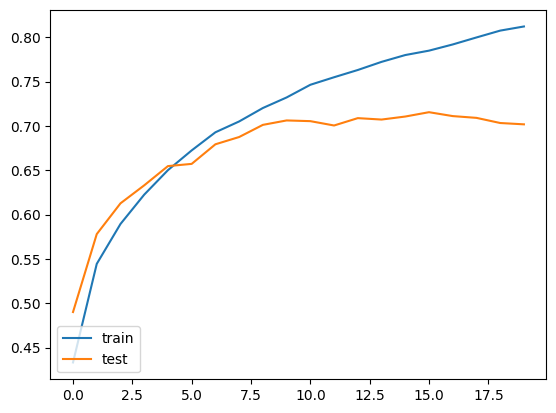

In [24]:
#plotting the training and test accuracies for the model
import matplotlib.pyplot as plt

plt.plot(model_history.history["accuracy"],label="accuracy")
plt.plot(model_history.history["val_accuracy"],label="val_accuracy")
plt.legend(["train","test"],loc="lower left")

now we make a prediction on one of the images in the test set
- let's predict the label for image 25
- we know that image 25 contains a bird

In [31]:
#making predicts on a single image
output = model.predict(test_images)
prediction = np.argmax(output[25])
print(prediction)
#the output of 4 corresponds with the labels of the categories of images
#4 corresponds to the 4th item in the list (remember count from zero) which is a bird so is correct!!

4
